In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, ExpSineSquared, ConstantKernel
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from datetime import datetime

In [3]:
# Data-Set importing the Dataset: SGEMM GPU kernel performance Data Set
df_gpu_kernel = pd.read_csv("sgemm_product.csv")
print(df_gpu_kernel.isnull().sum())
df_gpu_kernel.info()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
MWG          241600 non-null int64
NWG          241600 non-null int64
KWG          241600 non-null int64
MDIMC        241600 non-null int64
NDIMC        241600 non-null int64
MDIMA        241600 non-null int64
NDIMB        241600 non-null int64
KWI          241600 non-null int64
VWM          241600 non-null int64
VWN          241600 non-null int64
STRM         241600 non-null int64
STRN         241600 non-null int64
SA           241600 non-null int64
SB           241600 non-null int64
Run1 (ms)    241600 non-null float64
Run2 (ms)    241600 non-null float64
Run3 (ms)    241600 non-null float64
Run4 

In [4]:
df_gpu_kernel.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [5]:
#Preparing the final dataset
x = df_gpu_kernel[df_gpu_kernel.columns[:-5]] 
y = (df_gpu_kernel['Run1 (ms)']+df_gpu_kernel['Run2 (ms)']+df_gpu_kernel['Run3 (ms)']+df_gpu_kernel['Run4 (ms)'])/4

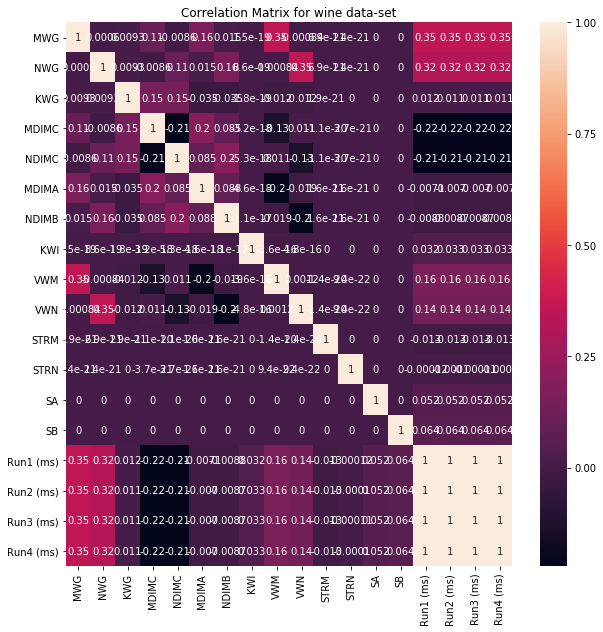

In [7]:
#Analysing Correlation between various features of the wine dataset
gpu_corr = df_gpu_kernel.corr()
figure, ax = plt.subplots(figsize = (10,10))
ax.set_title('Correlation Matrix for wine data-set')
matrix = sns.heatmap(gpu_corr,ax=ax, annot= True)

In [8]:
#Creating Traning and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [9]:
def svr_param_selection(X, y, nfolds):
    Kernels = ['linear', 'poly', 'rbf']
    Cs = [0.001, 0.01]
    Gammas = [0.001]
    param_grid = {'kernel':Kernels, 'C': Cs, 'gamma' : Gammas}
    grid_search = GridSearchCV(SVR(), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('SVR Lowest MSE Score: '+str(grid_search.best_score_))
    print('SVR With Parameters: '+str(grid_search.best_params_))    
    return grid_search.best_params_

In [10]:
def random_forest_regressor_param_selection(X, y, nfolds):
    Estimators = np.arange(1,100,25)
    Max_features = ['auto', 'sqrt']
    Min_samples_leafs = np.linspace(0.01, 0.05, 5, endpoint=True)
    param_grid = {'n_estimators': Estimators, 'max_features': Max_features, 'min_samples_leaf': Min_samples_leafs}
    grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('RandomForestRegressor Lowest MSE Score: '+str(grid_search.best_score_))
    print('RandomForestRegressor With Parameters: '+str(grid_search.best_params_))    
    return grid_search.best_params_

In [11]:
def decision_tree_regressor_param_selection(X, y, nfolds):
    Max_features = ['auto', 'sqrt']
    Min_samples_leafs = np.linspace(0.01, 0.05, 5, endpoint=True)
    param_grid = {'max_features': Max_features, 'min_samples_leaf': Min_samples_leafs}
    grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('DecisionTreeRegressor Lowest MSE Score: '+str(grid_search.best_score_))
    print('DecisionTreeRegressor With Parameters: '+str(grid_search.best_params_))    
    return grid_search.best_params_

In [12]:
def ada_boost_regressor_param_selection(X, y, nfolds):
    Estimators = np.arange(1,100,15)
    Learning_rates = [0.3]
    Losses = ['linear', 'square', 'exponential']
    param_grid = {'n_estimators': Estimators, 'learning_rate': Learning_rates, 'loss': Losses}
    grid_search = GridSearchCV(AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=0),random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('AdaBoostRegressor Lowest MSE Score:'+str(grid_search.best_score_))
    print('AdaBoostRegressor With Parameters:'+str(grid_search.best_params_))    
    return grid_search.best_params_

In [13]:
def gaussian_regressor_param_selection(X, y, nfolds):
    kernel_rbf = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed")
    kernel_rq = ConstantKernel(1.0, constant_value_bounds="fixed") * RationalQuadratic(alpha=0.1, length_scale=1)
    kernel_expsine = ConstantKernel(1.0, constant_value_bounds="fixed") * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1))
    Kernels = [kernel_rbf, kernel_rq, kernel_expsine]
    param_grid = {'kernel': Kernels}
    grid_search = GridSearchCV(GaussianProcessRegressor(random_state=0), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('GaussianRegressor Lowest MSE Score:'+str(grid_search.best_score_))
    print('GaussianRegressor With Parameters:'+str(grid_search.best_params_))    
    return grid_search.best_params_

In [14]:
def linear_regressor_param_selection(X, y, nfolds):
    param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
    grid_search = GridSearchCV(LinearRegression(), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('LinearRegressor Lowest MSE Score:'+str(grid_search.best_score_))
    print('LinearRegressor With Parameters:'+str(grid_search.best_params_))    
    return grid_search.best_params_

In [15]:
def neural_network_regressor_param_selection(X, y, nfolds):
    Learning_rates = ['constant','adaptive']
    Learning_rates_init = [ 0.3]
    Hidden_Layer_Sizes = [(5,5), (10,5)]
    Activations = ['logistic', 'tanh', 'relu']
    Alphas = [0.0001,0.002]
    param_grid = {'learning_rate': Learning_rates, 'learning_rate_init': Learning_rates_init, 'hidden_layer_sizes': Hidden_Layer_Sizes, 'activation': Activations, 'alpha': Alphas}
    grid_search = GridSearchCV(MLPRegressor(max_iter=900), param_grid, cv=nfolds, n_jobs=-1)
    grid_search.fit(X, y)
    print('NeuralNetworkRegressor Lowest MSE Score:'+str(grid_search.best_score_))
    print('NeuralNetworkRegressor With Parameters:'+str(grid_search.best_params_))    
    return grid_search.best_params_

In [16]:
#Using the 3-Fold HyperParam Search to evaluate the best hyperparams for each model
# print("now ="+str(datetime.now()))
# svr_best_param           = svr_param_selection(x_train_scaled, y_train, 3)
print("now ="+str(datetime.now()))
random_forest_best_param = random_forest_regressor_param_selection(x_train, y_train, 3)
print("now ="+str(datetime.now()))
decision_tree_best_param = decision_tree_regressor_param_selection(x_train, y_train, 3)
print("now ="+str(datetime.now()))
ada_boost_best_param     = ada_boost_regressor_param_selection(x_train, y_train, 3)
print("now ="+str(datetime.now()))
linear_best_param         = linear_regressor_param_selection(x_train, y_train, 3)
print("now ="+str(datetime.now()))
# neural_network_best_param = neural_network_regressor_param_selection(x_train_scaled, y_train, 3)
# print("now ="+str(datetime.now()))
#gaussian_best_param       = gaussian_regressor_param_selection(x_train_scaled, y_train, 3)
#print("now ="+str(datetime.now()))

now =2019-11-30 17:45:04.786700
RandomForestRegressor Lowest MSE Score: 0.7736414571216635
RandomForestRegressor With Parameters: {'max_features': 'auto', 'min_samples_leaf': 0.01, 'n_estimators': 76}
now =2019-11-30 17:49:36.120864
DecisionTreeRegressor Lowest MSE Score: 0.8129318507289012
DecisionTreeRegressor With Parameters: {'max_features': 'auto', 'min_samples_leaf': 0.01}
now =2019-11-30 17:49:39.171509


/home/kbeepi/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/kbeepi/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/kbeepi/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/kbeepi/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/extern

KeyboardInterrupt: 

In [ ]:
#Checking MSE of each of the best regressors on test data

In [ ]:
print("now ="+str(datetime.now()))
svr_best_param           = svr_param_selection(x_train_scaled, y_train, 3)
print("now ="+str(datetime.now()))

In [ ]:
best_svr = SVR(C=1, gamma=0.1, kernel='rbf')
best_svr.fit(x_train_scaled, y_train)
y_pred = best_svr.predict(x_test_scaled)
print('MSE for SVR: '+str(mean_squared_error(y_test, y_pred)))
print(best_svr.score(x_test_scaled))

In [ ]:
best_decision_tree_regressor = DecisionTreeRegressor(max_features='auto', min_samples_leaf=0.05, random_state=0)
best_decision_tree_regressor.fit(x_train_scaled, y_train)
y_pred = best_decision_tree_regressor.predict(x_test_scaled)
print('MSE for Decision Tree Regressor: '+str(mean_squared_error(y_test, y_pred)))

In [ ]:
best_random_forest_regressor = RandomForestRegressor(max_features='auto', min_samples_leaf=0.01, n_estimators=91, random_state=0)
best_random_forest_regressor.fit(x_train_scaled, y_train)
y_pred = best_random_forest_regressor.predict(x_test_scaled)
print('MSE for Random Forest Regressor: '+str(mean_squared_error(y_test, y_pred)))

In [ ]:
best_ada_boost_regressor = AdaBoostRegressor(learning_rate=0.01, loss='linear', n_estimators=91, random_state=0)
best_ada_boost_regressor.fit(x_train_scaled, y_train)
y_pred = best_ada_boost_regressor.predict(x_test_scaled)
print('MSE for AdaBoost Regressor: '+str(mean_squared_error(y_test, y_pred)))

In [ ]:
best_linear_regressor = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)
best_linear_regressor.fit(x_train, y_train)
y_pred = best_linear_regressor.predict(x_test)
print('MSE for Linear Regressor: '+str(mean_squared_error(y_test, y_pred)))

In [ ]:
best_neural_network_regressor = MLPRegressor(activation='logistic', alpha=0.002, hidden_layer_sizes=(10, 5), learning_rate='constant', learning_rate_init=0.01, random_state=0)
best_neural_network_regressor.fit(x_train_scaled, y_train)
y_pred = best_neural_network_regressor.predict(x_test_scaled)
print('MSE for Neural Network Regressor: '+str(mean_squared_error(y_test, y_pred)))